# **Quais fatores mais influenciam o peso de recém nascidos?**

Neste notebook, analisaremos um dataset que contém dados relacionados sobre o peso de recém nascidos.

## Importando pacotes 

In [1]:
# Limpeza e análise 
import pandas as pd 

# vizualização
import matplotlib.pyplot as plt 
import seaborn as sns 

## Carregando dados 

In [3]:
df = pd.read_csv(r"C:\Users\renil\Downloads\babies.csv")

In [4]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


# Entendendo melhor as variáveis

## Quantitativas:
### case --> Indicador único para cada entrada da tabela.
### bwt --> Peso da criança ao nascer.
### gestation --> Tempo de gestação, em dias.
### age --> Idade da mãe ao dar a luz.
### height --> Altura da mãe ao dar a luz.
### weight --> Peso da mão ao dar a luz.
## Categóricas:
### smoke --> Houve tabagismo na gravidez? 
### parity --> Número de filhos anteriores.

# Limpeza de dados

In [7]:
# procurando por duplicatas
df.duplicated().sum()

0

In [8]:
# procurando por dados vazios
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [9]:
# preenchendo dados vazios 
df['gestation'] = df['gestation'].fillna(df['gestation'].mean())
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())
df['smoke'].dropna()

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1231    0.0
1232    0.0
1233    1.0
1234    0.0
1235    0.0
Name: smoke, Length: 1226, dtype: float64

In [10]:
# checando resultados
df.isnull().sum()

case          0
bwt           0
gestation     0
parity        0
age           0
height        0
weight        0
smoke        10
dtype: int64

# Análise Exploratória de Dados

In [12]:
# resumo estatístico
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.253236,64.046926,128.520227,0.394780
std,356.946775,18.236452,15.943114,0.435956,5.776943,2.510751,20.672940,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,115.000000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,138.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


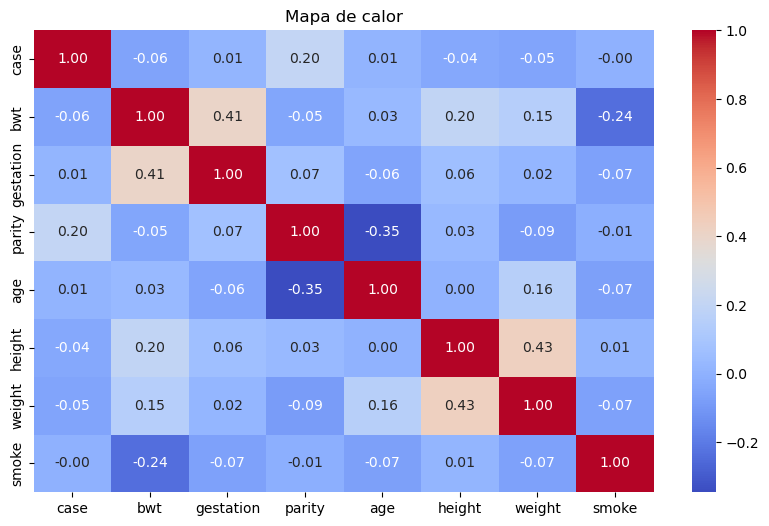

In [13]:
# calculando matriz de correlação 
matriz = df.corr()

# configurando
plt.figure(figsize= (10, 6))
sns.heatmap(matriz, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title("Mapa de calor")

# exibindo mapa
plt.show()


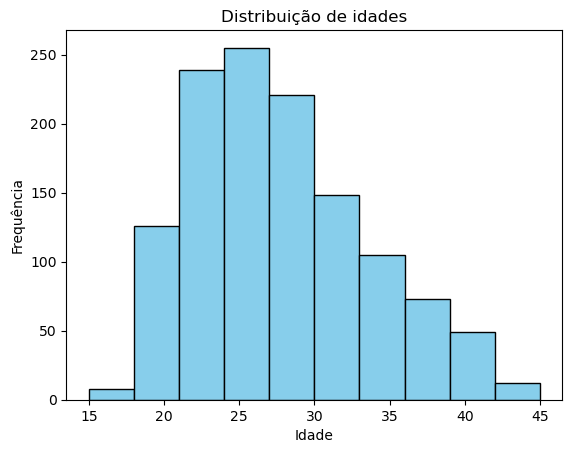

In [14]:
# Distruibuição de idade 
plt.hist(df['age'], bins= 10, color= 'skyblue', edgecolor= 'black')
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Relação entre idade e peso ao nascer

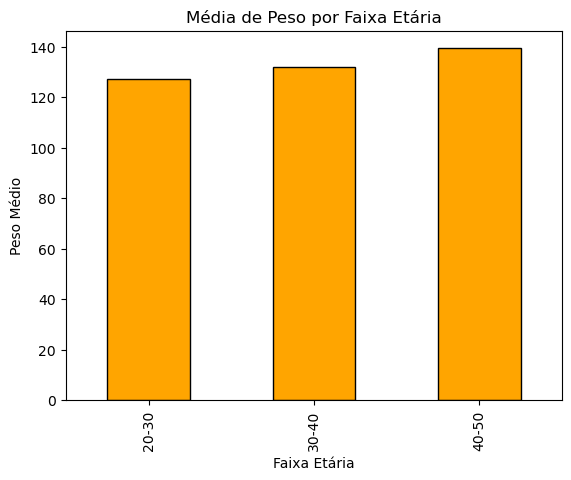

In [16]:
# Criando categorias de faixa etária
df['faixa_etaria'] = pd.cut(df['age'], bins= [20, 30, 40, 50], labels= ['20-30', '30-40', '40-50'])

# Calculando média de peso por faixa etária
media_peso = df.groupby('faixa_etaria', observed=True)['weight'].mean()

# Plotar gráfico de barras
media_peso.plot(kind= 'bar', color= 'orange', edgecolor= 'black')
plt.title('Média de Peso por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Peso Médio')

# exibindo gráfico
plt.show()

# Relação entre o peso da mãe e o peso da criança ao nascer

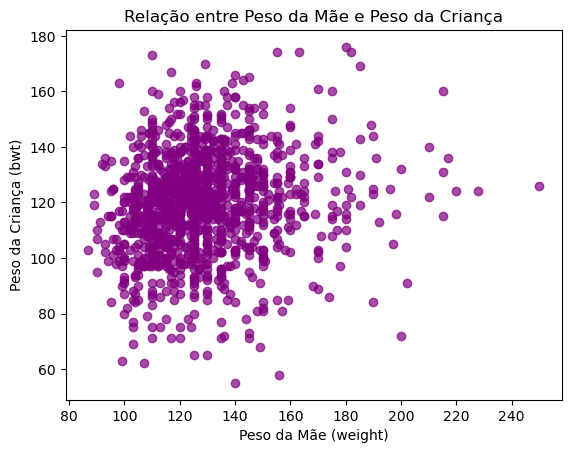

In [18]:
plt.scatter(df['weight'], df['bwt'], color='purple', alpha=0.7)
plt.title('Relação entre Peso da Mãe e Peso da Criança')
plt.xlabel('Peso da Mãe (weight)')
plt.ylabel('Peso da Criança (bwt)')
plt.show()

# Relação entre o tempo de gestação e o peso da criança

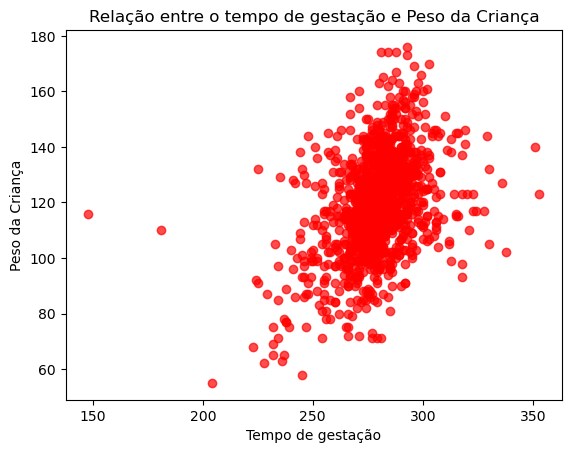

In [20]:
plt.scatter(df['gestation'], df['bwt'], color='red', alpha= 0.7)
plt.title('Relação entre o tempo de gestação e Peso da Criança')
plt.xlabel('Tempo de gestação')
plt.ylabel('Peso da Criança')

plt.show()

# Relação entre tabagismo e o peso da criança

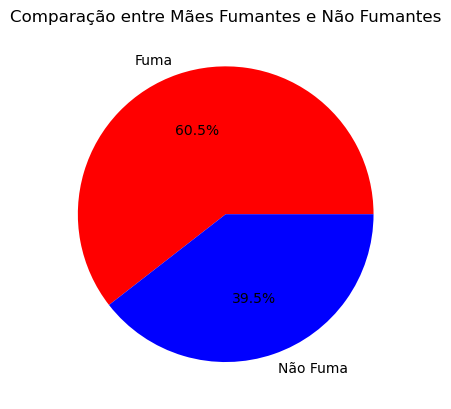

In [43]:
# Contar as mães que fumam e as que não fumam
fumantes = df['smoke'].value_counts()

# Criar o gráfico
plt.pie(fumantes, labels= ['Fuma' , 'Não Fuma'], autopct='%1.1f%%', colors= ['Red', 'Blue'])
plt.title('Comparação entre Mães Fumantes e Não Fumantes')

plt.show()

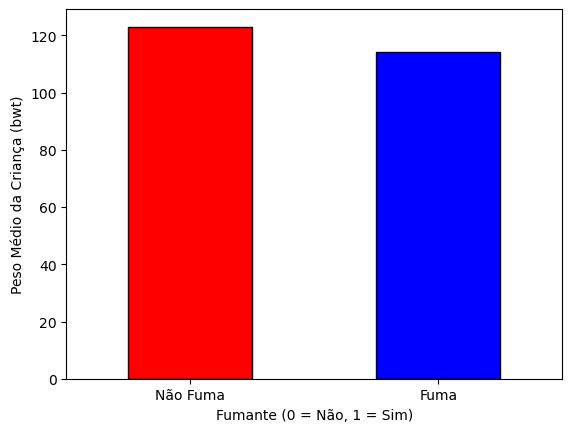

In [47]:
media_peso = df.groupby('smoke')['bwt'].mean()

media_peso.plot(kind= 'bar', color= ['red', 'blue'], edgecolor= 'black')
plt.xlabel('Fumante (0 = Não, 1 = Sim)')
plt.ylabel('Peso Médio da Criança (bwt)')
plt.xticks([0, 1], ['Não Fuma', 'Fuma'], rotation=0)
plt.show()

# Relação entre primigesta e o peso da criança
obs: "Primigesta" é um termo para se referir a primeira gestação de uma mulher

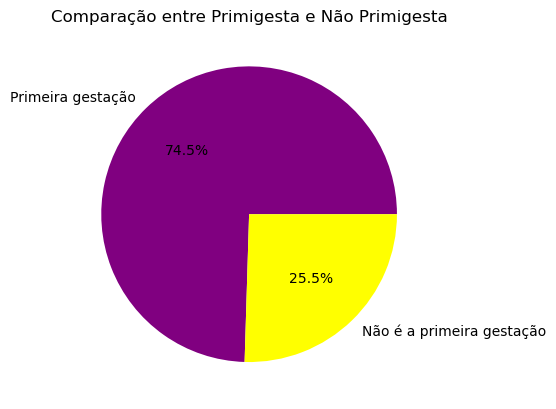

In [51]:
primigesta = df['parity'].value_counts()

# Criar o gráfico
plt.pie(primigesta, labels= ['Primeira gestação' , 'Não é a primeira gestação'], autopct='%1.1f%%', colors= ['Purple', 'Yellow'])
plt.title('Comparação entre Primigesta e Não Primigesta')

plt.show()

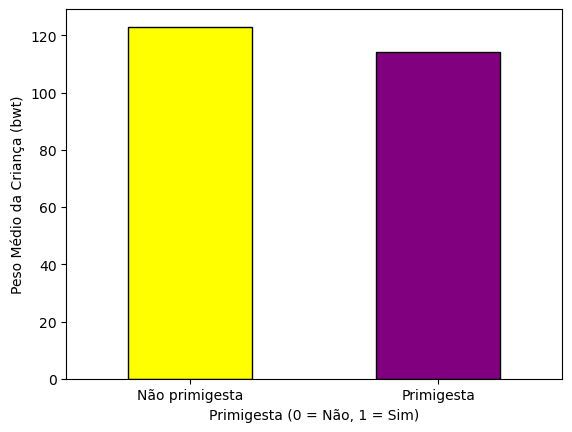

In [55]:
media_primigesta = df.groupby('parity')['bwt'].mean()

media_peso.plot(kind= 'bar', color= ['yellow', 'purple'], edgecolor= 'black')
plt.xlabel('Primigesta (0 = Não, 1 = Sim)')
plt.ylabel('Peso Médio da Criança (bwt)')
plt.xticks([0, 1], ['Não primigesta', 'Primigesta'], rotation=0)
plt.show()

# Conclusões

## A maioria das mães tem entre 20 e 30 anos, e mães mais velhas tendem a ter bebês mais pesados.
## Existem uma leve tendência de mães mais pesadas terem filhos mais pesados.
## A maioria das mães que tiverem um tempo maior de gestação tiverem também bebês mais pesados.
## A maioria das mães não são fumantes, e as que fumam tendem a ter bebês mais leves.
## A maioria das mães estão na sua primeira gestação, e as que não estão aprensentam uma tendência leve a terem bebês mais pesados.